In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import pysindy as ps
from sindy_utils import sindy_simulate, sindy_library
from functions import Rossler, Solution

In [19]:
a, b, c = 0.15, 0.2, 10
h = np.pi/100
t = np.arange(0,100,h)
n = len(t)
x0 =[0.1,1,0.1]
xs,ys,zs = Solution(Rossler, x0, t, [a,b,c])
tau = 17

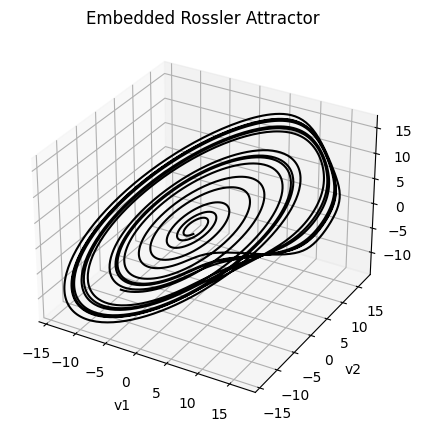

In [20]:
v1 = xs[0: n - 2*tau] #x(t)
v2 = xs[tau: n - tau] #x(t + τ)
v3 = xs[2*tau: n] #x(t + 2τ)

fig = plt.figure(figsize=(9, 5))
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot(v1, v2, v3, color = "k")
ax3d.set_title("Embedded Rossler Attractor")
ax3d.set_xlabel("v1")
ax3d.set_ylabel("v2")
ax3d.set_zlabel("v3")
plt.show()

In [21]:
v = np.array([v1, v2, v3]).T
x = np.array([xs[:len(v1)], ys[:len(v1)], zs[:len(v1)]]).T
Phi = sindy_library(v,2)
model = Lasso(alpha=1e-2, max_iter= 100000, fit_intercept=False)
model.fit(Phi, x)
sol = model.predict(Phi)
score = model.score(Phi, x)
print("Score:", score)

Score: 0.9907682152676496


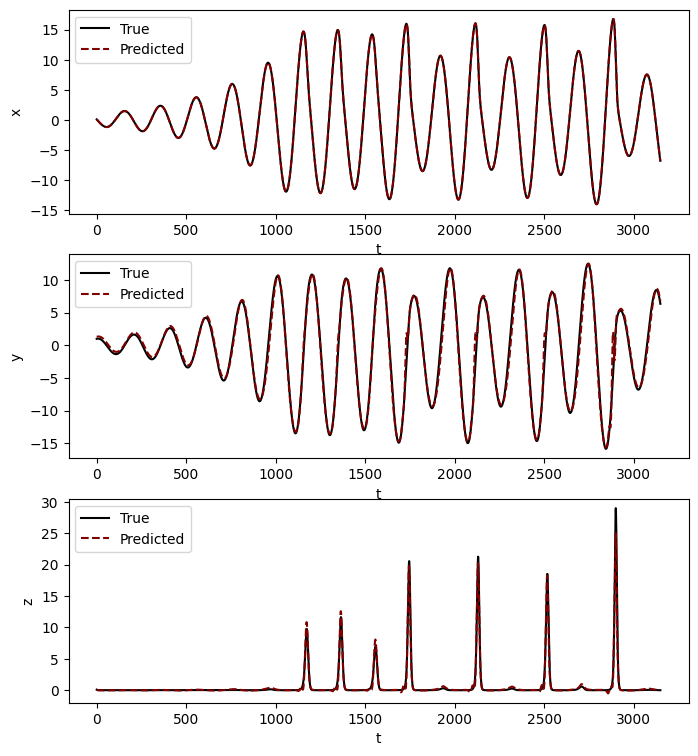

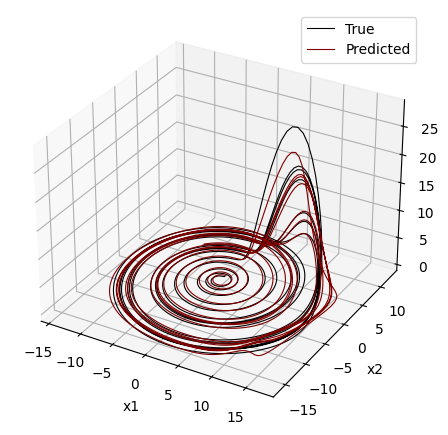

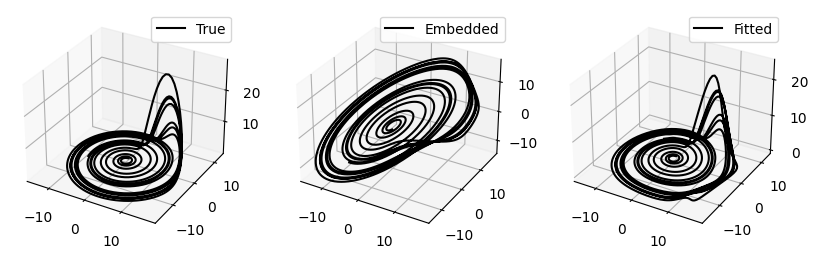

In [22]:
fig1, ax = plt.subplots(3, 1, figsize=(8, 9))
fig2 = plt.figure(figsize=(13, 13))
ax3d = fig2.add_subplot(1, 3, 1, projection='3d')
ax[0].plot(x[:,0], label='True', color = "k")
ax[0].plot(sol[:,0], label='Predicted', linestyle='dashed', color = "maroon")
ax[0].set_xlabel("t")
ax[0].set_ylabel("x")
ax[0].legend()
ax[1].plot(x[:,1], label='True', color = "k")
ax[1].plot(sol[:,1],linestyle='dashed', color = "maroon", label='Predicted')
ax[1].set_xlabel("t")
ax[1].set_ylabel("y")
ax[1].legend()
ax[2].plot(x[:,2], label='True', color = "k")
ax[2].plot(sol[:,2], linestyle='dashed', color = "maroon",label='Predicted')
ax[2].set_xlabel("t")
ax[2].set_ylabel("z")
ax[2].legend()
ax3d.plot(x[:,0], x[:,1], x[:,2],lw=.8, color = "k",label='True')
ax3d.plot(sol[:,0], sol[:,1],sol[:,2], lw=.8, color = "maroon",label='Predicted')
ax3d.set_xlabel("x1")
ax3d.set_ylabel("x2")
ax3d.set_zlabel("x3")
ax3d.legend()
plt.tight_layout()
plt.show()
fig3, ax3 = plt.subplots(1, 3, figsize=(10, 9), subplot_kw={'projection': '3d'})
ax3[0].plot(xs, ys, zs, label="True", color = "k")
ax3[1].plot(v1, v2, v3, label="Embedded", color = "k")
ax3[2].plot(sol[:,0], sol[:,1],sol[:,2], label="Fitted",color = "k")
ax3[0].legend()
ax3[1].legend()
ax3[2].legend()
plt.show()

In [23]:
x_trans = sol[:,0]
y_trans = sol[:,1]
z_trans = sol[:,2]
t_trans = t[:len(x_trans)]

X = np.array([x_trans, y_trans, z_trans]).T

diff_method = ps.FiniteDifference(order = 1)
feature_library = ps.PolynomialLibrary(degree = 2)
optimizer = ps.STLSQ(threshold=0.1)

model = ps.SINDy(
    differentiation_method=diff_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y", "z"],
)

model.fit(X, t_trans)
model.print()

(x)' = -0.995 y + -1.067 z
(y)' = 1.001 x + 0.138 y + -0.104 z
(z)' = 0.606 1 + -10.530 z + 0.994 x z


In [24]:
coef = model.coefficients().T
sindy_sol = sindy_simulate(np.array([x_trans[0], y_trans[0], z_trans[0]]), t_trans, coef, 2)

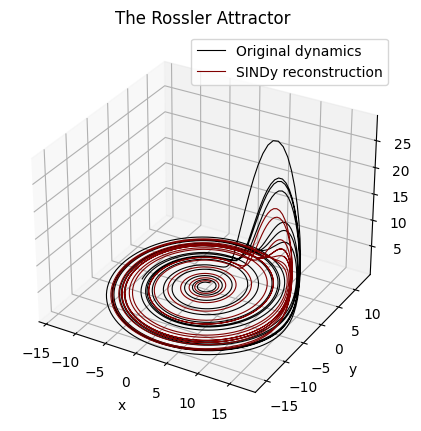

In [25]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs, ys, zs,color = 'k', lw = .8, label = "Original dynamics")
ax.plot(sindy_sol[:,0], sindy_sol[:,1], sindy_sol[:,2], lw = .8, color = 'maroon', label = "SINDy reconstruction")
ax.set_title("The Rossler Attractor")
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_zlabel("z")
plt.legend()
plt.show()